# Lie Detection: Reliability of Relevant Predictors in Classifiers

[INTRODUCTION OF THE PROBLEM HERE]

### Datasets:
[ADD AND COMMENT ABOUT DATASETS HERE]
### Tasks:
[ADD TASK HERE]

### Integrants:
Name, Matricola, Email respectively
- Santiago Víquez Segura, 2048722, santiago.viquezsegura@studenti.unipd.it
- Phillippe Robert, 2041505, philippe.robert@studenti.unipd.it
- Huzaifa Fazal,

## Dependencies

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm
import shap

## Load datasets

In [33]:
BF_CTU_df = pd.read_csv("data/BF_df_CTU.csv", delimiter=",")
BF_OU_df = pd.read_csv("data/BF_df_OU.csv", delimiter=",")
BF_V_df = pd.read_csv("data/BF_df_V.csv", delimiter=",")
DT_CC_df = pd.read_csv("data/DT_df_CC.csv", delimiter=",")
DT_JI_df = pd.read_csv("data/DT_df_JI.csv", delimiter=";")
IADQ_df = pd.read_csv("data/IADQ_df.csv", delimiter=",")
IESR_df = pd.read_csv("data/IESR_df.csv", delimiter=",")
NAQR_df = pd.read_csv("data/NAQ_R_df.csv", delimiter=";")
PCL5_df = pd.read_csv("data/PCL5_df.csv", delimiter=";")
PHQ9_df = pd.read_csv("data/PHQ9_GAD7_df.csv", delimiter=";")
PID5_df = pd.read_csv("data/PID5_df.csv", delimiter=";")
PRFQ_df = pd.read_csv("data/PRFQ_df.csv", delimiter=",")
PRMQ_df = pd.read_csv("data/PRMQ_df.csv", delimiter=",")
DDDT_df = pd.read_csv("data/RAW_DDDT.CSV", delimiter=",")
SPID5_df = pd.read_csv("data/sPID-5_df.csv", delimiter=",")
RNEOPI_honest_df = pd.read_excel("data/Honest.xlsx", header=1)
RNEOPI_fake_df = pd.read_excel("data/Faked.xlsx", header=1)

## Baseline Feature Importance

In [18]:
def evaluate_clf(df, clf, cv):
    """
    Performs cross-validation of a classifier over a dataset
    
    Args:
        df: (pd.DataFrame) train dataset
        clf: (sklearn fitted estimator)
        cv: (int) number of folds
        
    Returns:
        output: (dict) {fit_time:[...], score_time:[...], estimator:[...], test_score:[...]}
    """
    X = df.loc[:, df.columns != 'CONDITION'] # select all columns except CONDITION
    y = np.where(df["CONDITION"] == "H", 1, 0)
    output = cross_validate(clf, X, y, cv=cv, scoring='f1', return_estimator=True)
    
    return output

In [19]:
def get_feature_importance(model_output):
    """
    Averages feature importances / coefficient values from all the fitted estimators
    
    Args:
        model_output: (list) sklearn fitted estimators
    
    Retruns: (dict) {predictor: value}
    """
    
    n_folds = len(output["estimator"])
    coeficients = 0
    
    for estimator in output["estimator"]:
        if isinstance(estimator, LogisticRegression) or isinstance(estimator, svm.SVC):
            coeficients += estimator.coef_[0] # TODO: RF uses feature_importances insted of coef_
        else:
            coeficients += estimator.feature_importances_
    coeficients = np.abs(coeficients/n_folds)
    res = dict(zip(estimator.feature_names_in_, coeficients))

    return res

In [20]:
def plot_feature_importance(feature_importance, title):
    """
    Plots a bar chart of the importance/coefficients of the predictors
    
    Args:
        feature_importance: (dict) dictionary with key:feature name and value:importance
        title: (str) title of the chart
    """
    
    plt.bar(x=feature_importance.keys(), height=feature_importance.values())
    plt.title(title)
    plt.xlabel("Feature Name")
    plt.ylabel("Abs(Importance Score)")
    plt.show()

In [ ]:
def get_shap_values(model_output):
    """
    Averages feature importances / coefficient values from all the fitted estimators
    
    Args:
        model_output: (list) sklearn fitted estimators
    
    Retruns: (dict) {predictor: value}
    """
    
    n_folds = len(output["estimator"])
    coeficients = 0
    
    for estimator in output["estimator"]:
        explainer = shap.Explainer(estimator, X, feature_names=estimator.feature_names_in_)
        shap_values = explainer(X)
        
    coeficients = np.abs(coeficients/n_folds)
    res = dict(zip(estimator.feature_names_in_, coeficients))

    return res

### Logistic Regression

Cross-Validated F1-Score: 0.8226637026072661


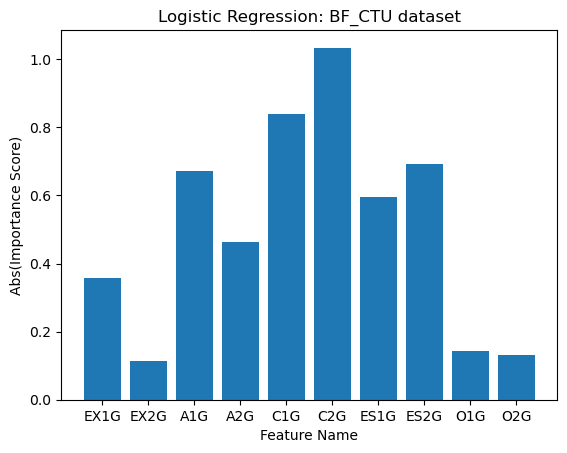

In [37]:
clf = LogisticRegression(solver="lbfgs")
output = evaluate_clf(BF_CTU_df, clf, cv=5)

f1_score = np.mean(output["test_score"])
feature_importance_lr = get_feature_importance(output)

print(f"Cross-Validated F1-Score: {f1_score}")
plot_feature_importance(feature_importance_lr, title="Logistic Regression: BF_CTU dataset")

### Random Forest

Cross-Validated F1-Score: 0.8432429393066491


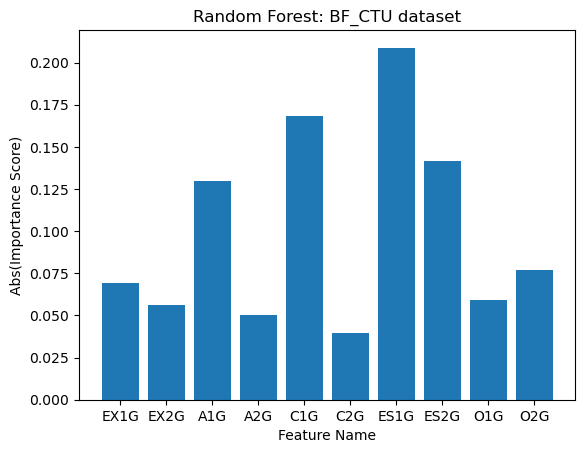

In [22]:
clf = RandomForestClassifier(n_estimators=300, random_state=42)
output = evaluate_clf(BF_CTU_df, clf, cv=5)

f1_score = np.mean(output["test_score"])
feature_importance_rf = get_feature_importance(output)

print(f"Cross-Validated F1-Score: {f1_score}")
plot_feature_importance(feature_importance_rf, title="Random Forest: BF_CTU dataset")

### SVM

Cross-Validated F1-Score: 0.8316540153684902


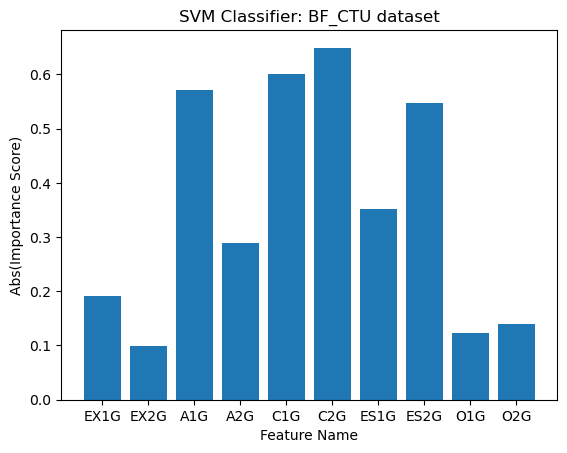

In [23]:
clf = svm.SVC(kernel="linear")
output = evaluate_clf(BF_CTU_df, clf, cv=5)

f1_score = np.mean(output["test_score"])
feature_importance_svm = get_feature_importance(output)

print(f"Cross-Validated F1-Score: {f1_score}")
plot_feature_importance(feature_importance_svm, title="SVM Classifier: BF_CTU dataset")

### XGBoost

Cross-Validated F1-Score: 0.8090204566675154


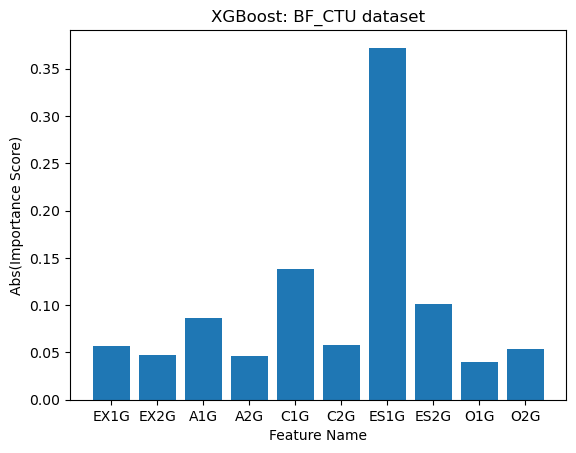

In [24]:
clf = XGBClassifier(random_state=42)
output = evaluate_clf(BF_CTU_df, clf, cv=5)

f1_score = np.mean(output["test_score"])
feature_importance_xgboost = get_feature_importance(output)

print(f"Cross-Validated F1-Score: {f1_score}")
plot_feature_importance(feature_importance_xgboost, title="XGBoost: BF_CTU dataset")

### Comparison: Feature Importance Accross Models without preprocessing

In [25]:
feature_importance_lr['model'] ="logistic_reg"
feature_importance_rf['model'] ="random_forest"
feature_importance_svm['model'] ="svm"
feature_importance_xgboost['model'] ="xgboost"

In [26]:
comparison_df = pd.DataFrame.from_dict([feature_importance_lr, 
                        feature_importance_rf, 
                        feature_importance_svm,
                        feature_importance_xgboost])
comparison_df

,EX1G,EX2G,A1G,A2G,C1G,C2G,ES1G,ES2G,O1G,O2G,model
0,0.358438,0.114962,0.670508,0.461994,0.838369,1.033874,0.594218,0.692499,0.143784,0.132161,logistic_reg
1,0.069195,0.056196,0.129879,0.050073,0.168118,0.039335,0.208812,0.141873,0.059272,0.077248,random_forest
2,0.192125,0.098985,0.570788,0.289365,0.600505,0.649067,0.351442,0.546422,0.123845,0.139825,svm
3,0.057278,0.047660,0.086165,0.045720,0.138653,0.057703,0.372128,0.100712,0.040343,0.053638,xgboost


In [27]:
comparison_df = comparison_df.melt(id_vars=["model"])
comparison_df

,model,variable,value
0,logistic_reg,EX1G,0.358438
1,random_forest,EX1G,0.069195
2,svm,EX1G,0.192125
3,xgboost,EX1G,0.057278
4,logistic_reg,EX2G,0.114962
5,random_forest,EX2G,0.056196
6,svm,EX2G,0.098985
7,xgboost,EX2G,0.047660
8,logistic_reg,A1G,0.670508
9,random_forest,A1G,0.129879


<AxesSubplot:xlabel='variable', ylabel='value'>

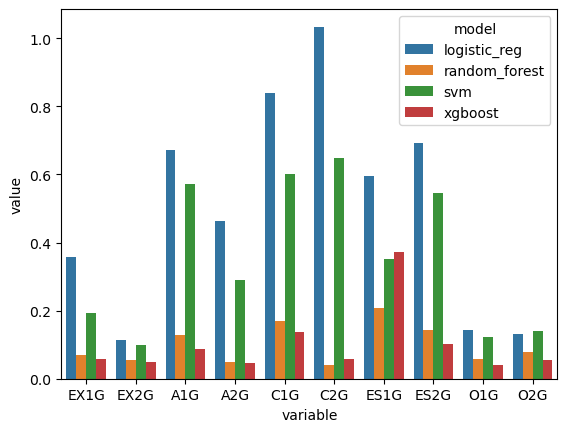

In [28]:
import seaborn as sns
sns.barplot(data=comparison_df, x="variable", y="value", hue="model")

# IDEAS, Questions about this
# If we only care about the order of importance
# Should we put every importance/coefficient value in the same scale as the others?
# Instead on only comparing with bar charts maybe implement a metric like (Jaro) https://datascience.stackexchange.com/questions/46727/calculating-similarity-where-order-matters
# To check the difference between importances across models, taking into account the order of importance

## Shapley Values test

In [92]:
clf = LogisticRegression(solver="lbfgs")
output = evaluate_clf(BF_CTU_df, clf, cv=5)
output

{'fit_time': array([0.01703691, 0.01041412, 0.0081811 , 0.00912309, 0.0080409 ]),
 'score_time': array([0.00306106, 0.00240993, 0.00177097, 0.00153494, 0.00131512]),
 'estimator': [LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression()],
 'test_score': array([0.79545455, 0.79518072, 0.86363636, 0.83146067, 0.82758621])}

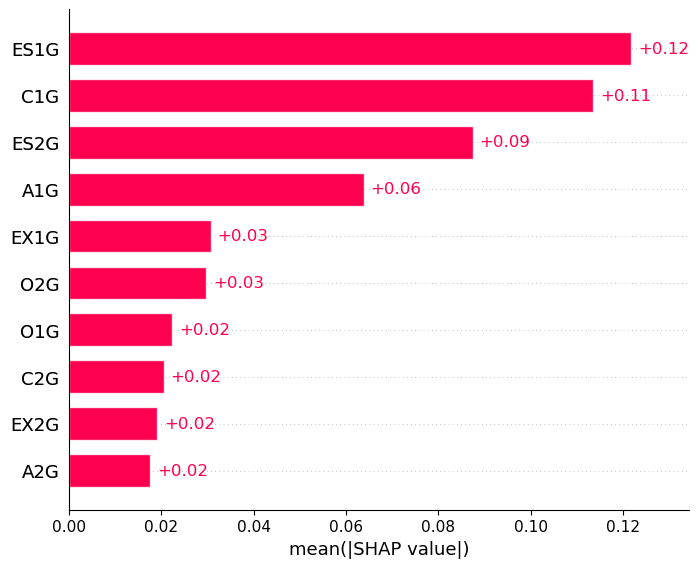

In [90]:
X = BF_CTU_df.loc[:, BF_CTU_df.columns != 'CONDITION'] # select all columns except CONDITION
y = np.where(BF_CTU_df["CONDITION"] == "H", 1, 0)

model = RandomForestClassifier().fit(X,y)

explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.bar(shap_values[:,:,1])

## Feature Selection Methods

### PCA

### Chi-Square

### Autoencoder Thing

### Sparce-PCA

### Etc

Feature importance scores can be fed to a wrapper model, such as the "SelectFromModel" class, to perform feature selection.

Way to calculate features importances:
- Coefficient statistic between each features